In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'Customer ID': range(1, 21),  # 20 sample customers
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 45, 36, 40, 58, 59, 55, 38, 20, 25],
    'Annual Income': [15, 16, 17, 18, 19, 20, 30, 33, 40, 42, 45, 48, 50, 52, 55, 58, 60, 63, 65, 68],
    'Spending Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 46, 55, 47, 42, 61, 50]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("customer_data.csv", index=False)

print("customer_data.csv file has been created.")


customer_data.csv file has been created.


In [3]:
df = pd.read_csv("customer_data.csv")
df.head()


,Customer ID,Age,Annual Income,Spending Score
0,1,19,15,39
1,2,21,16,81
2,3,20,17,6
3,4,23,18,77
4,5,31,19,40


In [4]:
df.shape
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     20 non-null     int64
 1   Age             20 non-null     int64
 2   Annual Income   20 non-null     int64
 3   Spending Score  20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes


np.int64(0)

In [5]:
X = df[['Age', 'Annual Income', 'Spending Score']]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


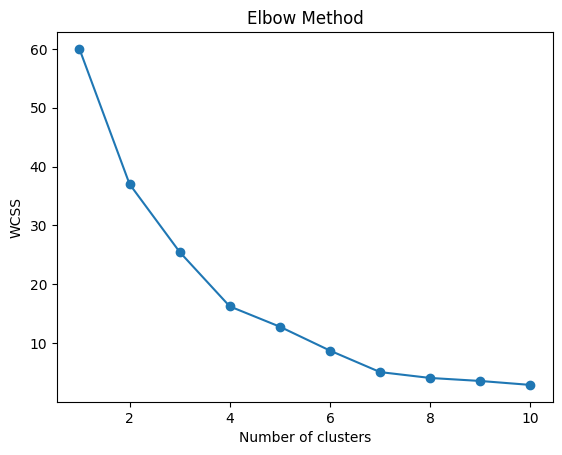

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [8]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for {k} clusters: {score}")


Silhouette Score for 2 clusters: 0.31498631765440566
Silhouette Score for 3 clusters: 0.3237673452043768
Silhouette Score for 4 clusters: 0.35808556521443785
Silhouette Score for 5 clusters: 0.3628230896692274
Silhouette Score for 6 clusters: 0.4362691399804313


In [9]:
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()


,Customer ID,Age,Annual Income,Spending Score,Cluster
0,1,19,15,39,3
1,2,21,16,81,3
2,3,20,17,6,2
3,4,23,18,77,3
4,5,31,19,40,2


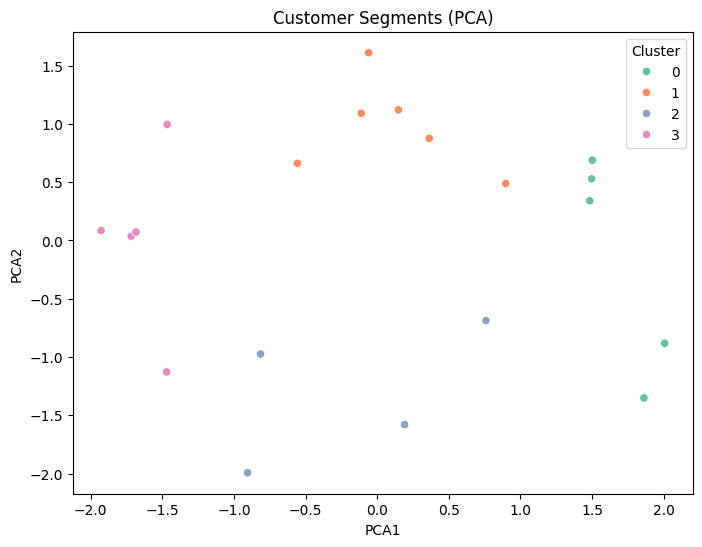

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Customer Segments (PCA)")
plt.show()


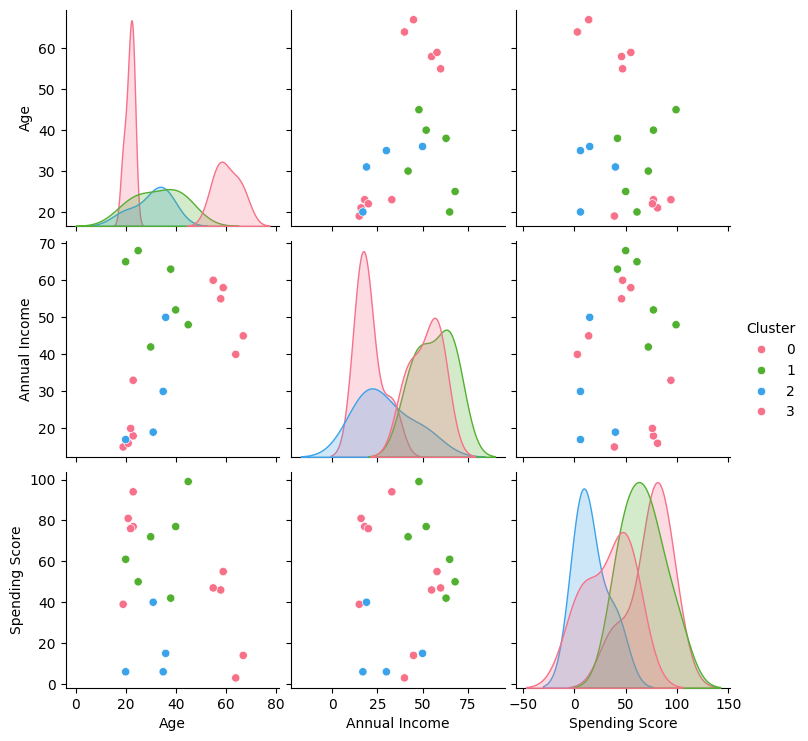

In [11]:
sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']], hue='Cluster', palette='husl')
plt.show()


In [12]:
df.to_csv("clustered_customer_data.csv", index=False)


In [13]:
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
print("Cluster Centroids (Original Scale):\n", centroids_original)


Cluster Centroids (Original Scale):
 [[60.6        51.6        33.        ]
 [33.         56.33333333 66.83333333]
 [30.5        29.         16.75      ]
 [21.6        20.4        73.4       ]]
